In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from brokenaxes import brokenaxes

In [2]:
res = pd.read_csv(os.path.join("results","proteins", "fspeptide", "trajectory-1.xtc_fs-peptide.pdb.csv"))
entity_name ="FS-Peptide, Trajectory 1"

In [3]:
labels = [
    f"Method: {row['method']}" + 
    (f", Params: {row['params']}" if row['method'] != "spectral" and row['params'] and len(str(row['params'])) > 5 else '') + 
    (f", Matrix: {row['matrix']}" if pd.notna(row['matrix']) else '') 
    
    for _, row in res.iterrows()
]

# Remove 'nan' and ',nan' from labels




labels = [label.replace('nan', '').replace(',nan', '') for label in labels]
res["new_labels"] = labels


In [4]:
# Ensure clustering is stored as an actual NumPy array
res["clustering"] = res["clustering"].apply(lambda x: np.array(x) if isinstance(x, (list, np.ndarray)) else np.fromstring(x[1:-1], sep=" "))

# Compute the number of unique clusters
res["nr_clusters"] = res["clustering"].apply(lambda x: len(np.unique(x)))


res["final_new_label"] = res["new_labels"] + "\n clusters: " + res["nr_clusters"].astype(str)

res["labels"] = res["final_new_label"]

labels = res["labels"]

In [5]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 4},delta,"[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...",0.028149,0.192162,"Method: spectral, Matrix: delta",4,"Method: spectral, Matrix: delta\n clusters: 4","Method: spectral, Matrix: delta\n clusters: 4"
1,HDBSCAN,hdbscan,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",0.016717,0.068465,"Method: hdbscan, Matrix: delta",5,"Method: hdbscan, Matrix: delta\n clusters: 5","Method: hdbscan, Matrix: delta\n clusters: 5"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.017110,0.040095,"Method: affinity, Matrix: delta",7,"Method: affinity, Matrix: delta\n clusters: 7","Method: affinity, Matrix: delta\n clusters: 7"
3,Spectral,spectral,{'cluster_count': 4},stddv,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.009944,0.256704,"Method: spectral, Matrix: stddv",4,"Method: spectral, Matrix: stddv\n clusters: 4","Method: spectral, Matrix: stddv\n clusters: 4"
4,HDBSCAN,hdbscan,{},stddv,"[0.0, 0.0, 0.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, ...",0.008610,0.099777,"Method: hdbscan, Matrix: stddv",5,"Method: hdbscan, Matrix: stddv\n clusters: 5","Method: hdbscan, Matrix: stddv\n clusters: 5"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.009172,0.107852,"Method: affinity, Matrix: stddv",5,"Method: affinity, Matrix: stddv\n clusters: 5","Method: affinity, Matrix: stddv\n clusters: 5"
6,Spectral,spectral,{'cluster_count': 4},delta+1std,"[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.016607,0.186375,"Method: spectral, Matrix: delta+1std",4,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",0.015569,0.068465,"Method: hdbscan, Matrix: delta+1std",5,"Method: hdbscan, Matrix: delta+1std\n clusters: 5","Method: hdbscan, Matrix: delta+1std\n clusters: 5"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.017786,0.040095,"Method: affinity, Matrix: delta+1std",7,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 4},delta+2std,"[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.017602,0.180867,"Method: spectral, Matrix: delta+2std",4,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."


In [6]:
import ast
nr_of_clusters_fixed = ast.literal_eval(res[res["method"] == "spectral"].iloc[0]["params"])["cluster_count"]

In [7]:
labels

0         Method: spectral, Matrix: delta\n clusters: 4
1          Method: hdbscan, Matrix: delta\n clusters: 5
2         Method: affinity, Matrix: delta\n clusters: 7
3         Method: spectral, Matrix: stddv\n clusters: 4
4          Method: hdbscan, Matrix: stddv\n clusters: 5
5         Method: affinity, Matrix: stddv\n clusters: 5
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 5
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 5
11    Method: affinity, Matrix: delta+2std\n cluster...
12                        Method: Resicon\n clusters: 4
13    Method: Comodo, Params: Elastic Network\n clus...
14    Method: Comodo, Params: Full Covariance Matrix...
15                        Method: Geostas\n clusters: 3
Name: labels, dtype: object

C:\Users\josef\AppData\Local\Temp\ipykernel_1352\4040899099.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\li

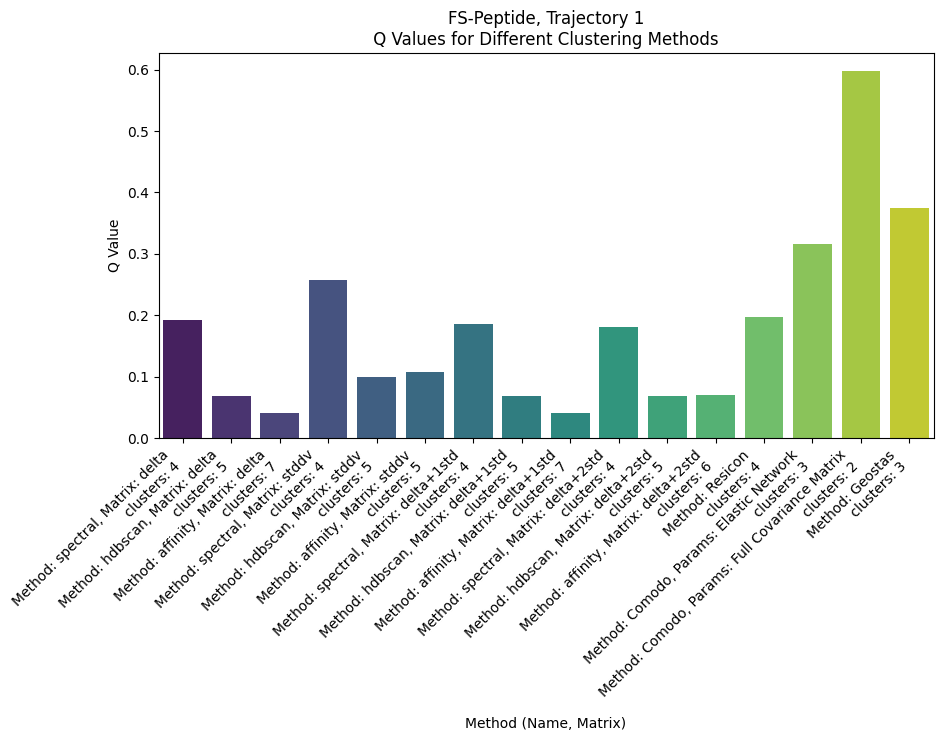

In [8]:
import seaborn as sns
Q_values =  [row['Q'] for _, row in res.iterrows()] 

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title(entity_name  + "\n Q Values for Different Clustering Methods ")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_1352\2697028971.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\li

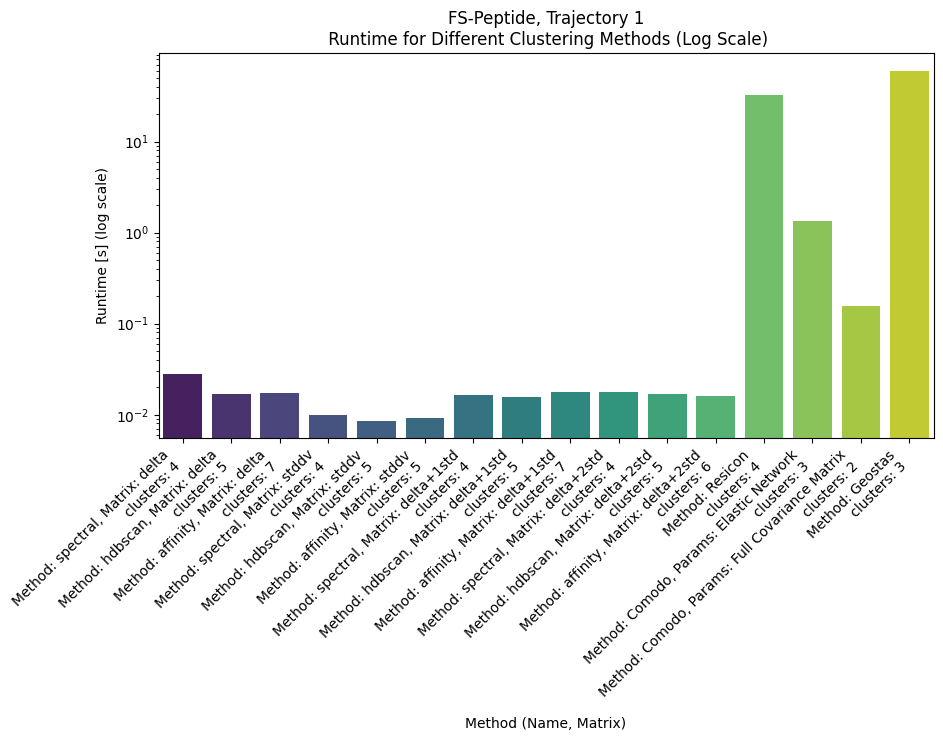

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Q_values = [row['runtime'] for _, row in res.iterrows()]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Runtime [s] (log scale)")
plt.title(entity_name + "\n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [10]:
labels

0         Method: spectral, Matrix: delta\n clusters: 4
1          Method: hdbscan, Matrix: delta\n clusters: 5
2         Method: affinity, Matrix: delta\n clusters: 7
3         Method: spectral, Matrix: stddv\n clusters: 4
4          Method: hdbscan, Matrix: stddv\n clusters: 5
5         Method: affinity, Matrix: stddv\n clusters: 5
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 5
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 5
11    Method: affinity, Matrix: delta+2std\n cluster...
12                        Method: Resicon\n clusters: 4
13    Method: Comodo, Params: Elastic Network\n clus...
14    Method: Comodo, Params: Full Covariance Matrix...
15                        Method: Geostas\n clusters: 3
Name: labels, dtype: object

In [11]:
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]

C:\Users\josef\AppData\Local\Temp\ipykernel_1352\3749775740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1

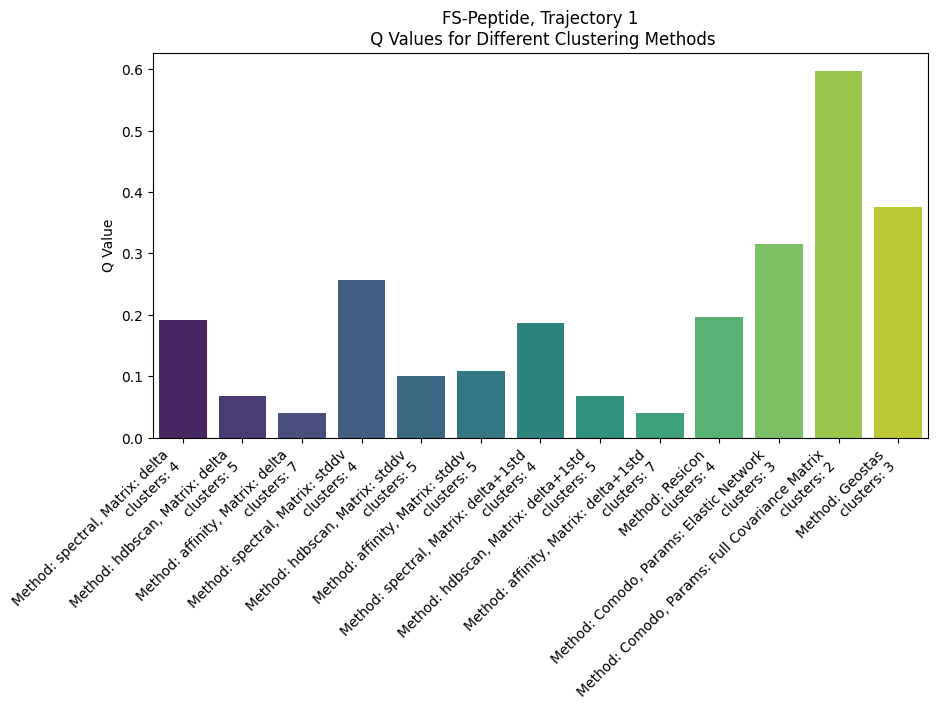

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]

Q_values =  np.array([row['Q'] for _, row in res.iterrows()])[selected_labels]
plot_labels = np.array(labels)[selected_labels]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_labels, y=Q_values, palette="viridis")

# Labels and title
plt.ylabel("Q Value")
plt.title(entity_name + "\n Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_1352\1034662476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1

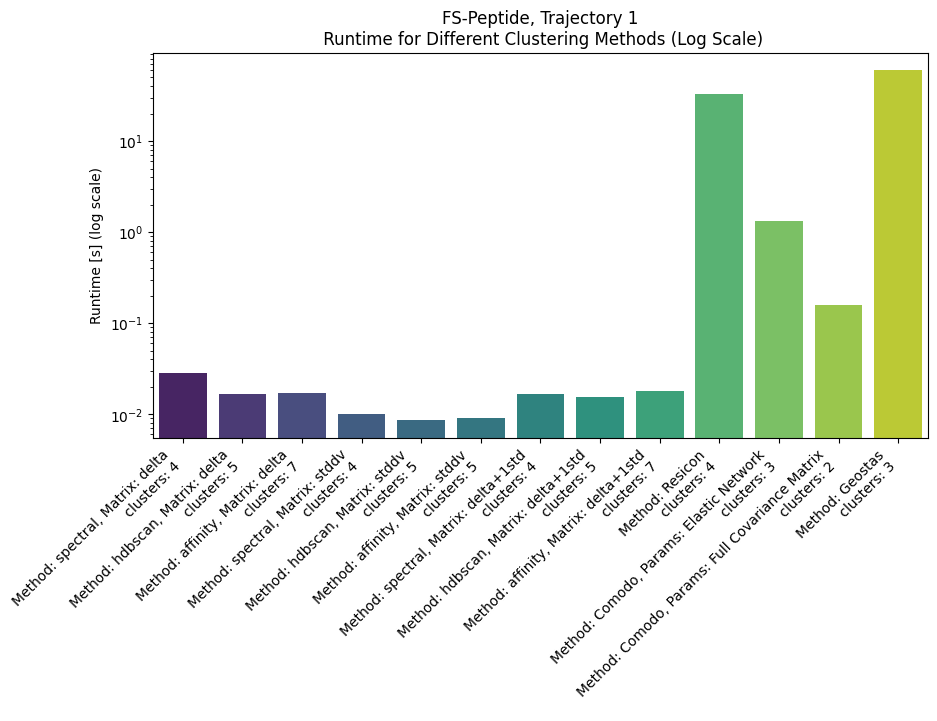

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]
# Assuming `res` is a pandas DataFrame
Q_values = np.array([row['runtime'] for _, row in res.iterrows()])[selected_labels]
plot_labels = np.array(labels)[selected_labels]
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.ylabel("Runtime [s] (log scale)")
plt.title(entity_name + "\n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [14]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 4},delta,"[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...",0.028149,0.192162,"Method: spectral, Matrix: delta",4,"Method: spectral, Matrix: delta\n clusters: 4","Method: spectral, Matrix: delta\n clusters: 4"
1,HDBSCAN,hdbscan,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",0.016717,0.068465,"Method: hdbscan, Matrix: delta",5,"Method: hdbscan, Matrix: delta\n clusters: 5","Method: hdbscan, Matrix: delta\n clusters: 5"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.017110,0.040095,"Method: affinity, Matrix: delta",7,"Method: affinity, Matrix: delta\n clusters: 7","Method: affinity, Matrix: delta\n clusters: 7"
3,Spectral,spectral,{'cluster_count': 4},stddv,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.009944,0.256704,"Method: spectral, Matrix: stddv",4,"Method: spectral, Matrix: stddv\n clusters: 4","Method: spectral, Matrix: stddv\n clusters: 4"
4,HDBSCAN,hdbscan,{},stddv,"[0.0, 0.0, 0.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, ...",0.008610,0.099777,"Method: hdbscan, Matrix: stddv",5,"Method: hdbscan, Matrix: stddv\n clusters: 5","Method: hdbscan, Matrix: stddv\n clusters: 5"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.009172,0.107852,"Method: affinity, Matrix: stddv",5,"Method: affinity, Matrix: stddv\n clusters: 5","Method: affinity, Matrix: stddv\n clusters: 5"
6,Spectral,spectral,{'cluster_count': 4},delta+1std,"[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.016607,0.186375,"Method: spectral, Matrix: delta+1std",4,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",0.015569,0.068465,"Method: hdbscan, Matrix: delta+1std",5,"Method: hdbscan, Matrix: delta+1std\n clusters: 5","Method: hdbscan, Matrix: delta+1std\n clusters: 5"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.017786,0.040095,"Method: affinity, Matrix: delta+1std",7,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 4},delta+2std,"[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.017602,0.180867,"Method: spectral, Matrix: delta+2std",4,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."
